# Click Models

### Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style, rc, font_manager
%matplotlib inline
# style.use('dark_background')
# style.use('seaborn-darkgrid')
style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
# font 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import random
import ast
import json
import numpy as np
from scipy.stats import skew

/Users/junhyeok.kim/.pyenv/versions/3.9.6/envs/ohsearch-ranking/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Load Data

In [2]:
def to_json(x):
    return ast.literal_eval(x)
def get_length(x):
    return len(x)

service = "card"
period = "1m"
version = "v2"

df = pd.read_csv(f"./{service}.click.ranking.base.{period}.rs.1K.{version}.sr.csv")

df["rank2docinfo"] = df["rank2docinfo"].apply(to_json)

df.head()
print(df.iloc[0]["rank2docinfo"]["1"].keys())

dict_keys(['id', 'qc', 'cc', 'ctr', 'uqc', 'ucc', 'uctr', 'avgRank', 'stdRank', 'scrapCnt'])


In [3]:
df.describe()

,qc,cc,ctr,uqc,ucc,uctr,docCnt
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,248.054000,170.937000,62.410875,56.669000,29.462000,54.733483,493.738000
std,719.023733,479.482275,18.790261,173.521201,79.165863,22.715356,713.487258
min,10.000000,0.000000,0.000000,10.000000,0.000000,0.000000,7.000000
25%,43.000000,24.000000,51.933551,13.000000,7.000000,38.247214,164.000000
50%,84.500000,58.000000,65.957447,20.000000,12.000000,54.545455,310.500000
75%,187.250000,131.000000,76.274536,43.000000,23.000000,71.428571,556.000000
max,12265.000000,7434.000000,108.571429,3284.000000,1357.000000,145.454545,10100.000000


In [15]:
new_df = []
for idx, row in df.iterrows():
    for rank, v in row["rank2docinfo"].items():
        new_df.append({
            "search_keyword": row["search_keyword"],
            "qqc": row["qc"],
            "qcc": row["cc"],
            "qctr": row["ctr"],
            "quqc": row["uqc"],
            "qucc": row["ucc"],
            "quctr": row["uctr"],
            "docCnt": row["docCnt"],
            "id": v["id"],
            "rank": int(rank),
            "qc": v["qc"],
            "cc": v["cc"],
            "ctr": v["ctr"],
            "uqc": v["uqc"],
            "ucc": v["ucc"],
            "uctr": v["uctr"],
            "avgRank": v["avgRank"],
            "stdRank": v["stdRank"],
            "scrapCnt": v["scrapCnt"],
        })
new_df = pd.DataFrame(new_df)
new_df

,search_keyword,qqc,qcc,qctr,quqc,qucc,quctr,docCnt,id,rank,qc,cc,ctr,uqc,ucc,uctr,avgRank,stdRank,scrapCnt
0,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,9793360,1,22,1,4.55,13,1,7.69,0.43,0.82,0
1,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,9338038,2,22,0,0.00,13,0,0.00,1.00,0.00,0
2,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,9793361,3,23,0,0.00,13,0,0.00,2.22,0.41,0
3,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,10428497,4,23,0,0.00,13,0,0.00,2.35,1.24,0
4,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,12022674,5,25,1,4.00,13,1,7.69,4.08,0.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265626,패브릭침대프레임,51,32,62.745098,12,5,41.666667,428,5921,296,2,0,0.00,1,0,0.00,268.00,0.00,0
265627,패브릭침대프레임,51,32,62.745098,12,5,41.666667,428,3644397,297,2,0,0.00,1,0,0.00,269.00,0.00,0
265628,패브릭침대프레임,51,32,62.745098,12,5,41.666667,428,2400142,298,2,0,0.00,1,0,0.00,270.00,0.00,0
265629,패브릭침대프레임,51,32,62.745098,12,5,41.666667,428,11559248,299,2,0,0.00,1,0,0.00,271.00,0.00,0


In [16]:
new_df.describe()

,qqc,qcc,qctr,quqc,qucc,quctr,docCnt,rank,qc,cc,ctr,uqc,ucc,uctr,avgRank,stdRank,scrapCnt
count,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,265631.000000,214423.000000,214423.000000,265631.00000
mean,270.973866,186.668265,63.102567,61.624803,31.911772,54.629807,545.295376,144.538672,18.924508,0.556652,1.740558,12.698525,0.522217,2.866580,113.987548,11.762738,0.00195
std,760.296563,506.687173,17.972495,183.679991,83.703915,21.930170,741.538440,86.521447,68.863835,2.684039,5.272707,45.511097,2.470913,9.382449,76.620301,19.817185,0.05026
min,10.000000,0.000000,0.000000,10.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,46.000000,27.000000,52.564103,13.000000,7.000000,38.596491,207.000000,69.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,49.055000,1.000000,0.00000
50%,92.000000,64.000000,66.666667,21.000000,12.000000,54.347826,352.000000,142.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,103.000000,3.690000,0.00000
75%,202.000000,143.000000,76.284585,49.000000,26.000000,71.171171,612.000000,219.000000,14.000000,0.000000,0.000000,10.000000,0.000000,0.000000,170.000000,12.510000,0.00000
max,12265.000000,7434.000000,108.571429,3284.000000,1357.000000,145.454545,10100.000000,300.000000,3986.000000,196.000000,200.000000,2753.000000,177.000000,100.000000,585.000000,534.350000,10.00000


In [17]:
# click 0 제외
new_df = new_df[new_df["cc"] > 0]

In [18]:
from click_models import CTR
myctr = CTR(df=new_df, impression_column="qc", click_column="cc")
new_df = myctr.regularize()
new_df


/Users/junhyeok.kim/bucketplace/projects/ohsearch-ranking/dataset/card/click_models.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/junhyeok.kim/bucketplace/projects/ohsearch-ranking/dataset/card/click_models.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/junhyeok.kim/bucketplace/projects/ohsearch-ranking/dataset/card/click_models.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,search_keyword,qqc,qcc,qctr,quqc,qucc,quctr,docCnt,id,rank,...,ctr,uqc,ucc,uctr,avgRank,stdRank,scrapCnt,ctr_raw,ctr_beta,ctr_gaussian
0,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,9793360,1,...,4.55,13,1,7.69,0.43,0.82,0,0.045455,0.058411,-0.491174
4,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,12022674,5,...,4.00,13,1,7.69,4.08,0.27,0,0.040000,0.053307,-0.552761
7,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,12806635,8,...,5.88,10,1,10.00,7.00,0.00,0,0.058824,0.069502,-0.340226
8,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,11107568,9,...,5.56,10,1,10.00,8.00,0.00,0,0.055556,0.066959,-0.377125
9,침대 프레임 킹,46,24,52.173913,12,6,50.000000,234,9871317,10,...,5.56,10,1,10.00,9.00,0.00,0,0.055556,0.066959,-0.377125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265568,패브릭침대프레임,51,32,62.745098,12,5,41.666667,428,15494735,238,...,33.33,1,1,100.00,225.00,0.00,0,0.333333,0.148407,2.759239
265588,패브릭침대프레임,51,32,62.745098,12,5,41.666667,428,10619896,258,...,20.00,2,1,50.00,172.33,75.90,0,0.200000,0.127697,1.253785
265593,패브릭침대프레임,51,32,62.745098,12,5,41.666667,428,9417500,263,...,33.33,1,1,100.00,238.00,0.00,0,0.333333,0.148407,2.759239
265595,패브릭침대프레임,51,32,62.745098,12,5,41.666667,428,15515607,265,...,33.33,1,1,100.00,240.00,0.00,0,0.333333,0.148407,2.759239


/var/folders/md/k_545kt57fl0mnpkzrkzv42hjp98mh/T/ipykernel_11367/2581732042.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/var/folders/md/k_545kt57fl0mnpkzrkzv42hjp98mh/T/ipykernel_11367/2581732042.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/var/folders/md/k_545kt57fl0mnpkzrkzv42hjp98mh/T/ipykernel_11367/2581732042.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/var/folders/md/k_545kt57fl0mnpkzrkzv42hjp98mh/T/ipykernel_11367/2581732042.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/var/folders/md/k_545kt57fl0mnpkzrkzv42hjp98mh/T/ipykernel_11367/2581732042.py:24: UserWarning: Matplotl

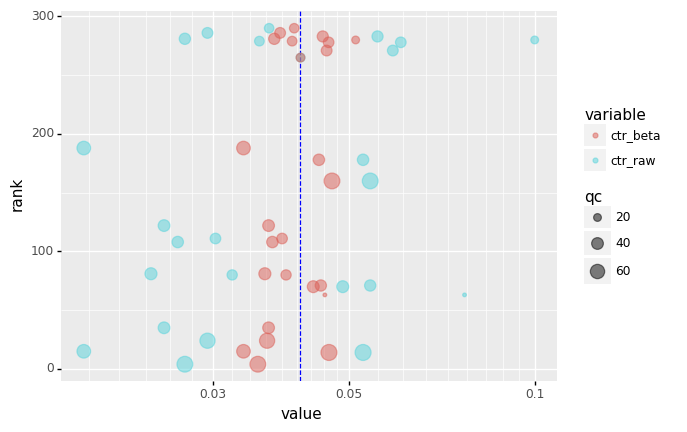

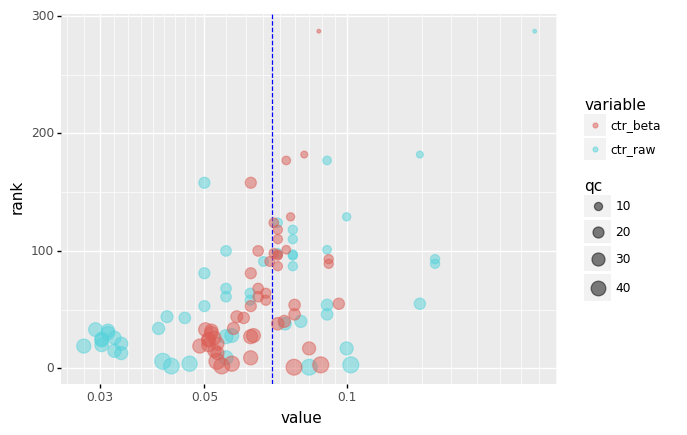

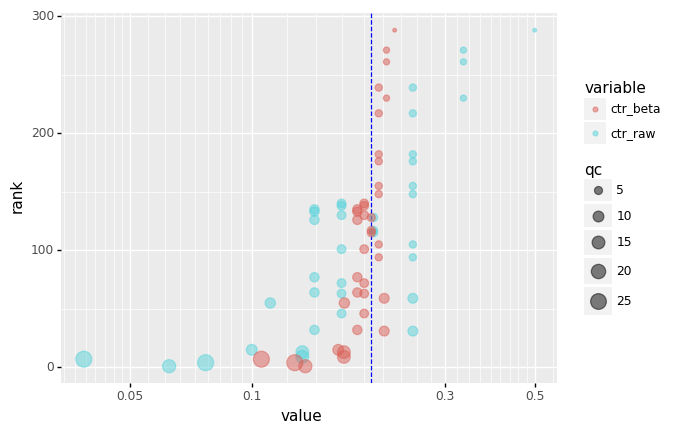

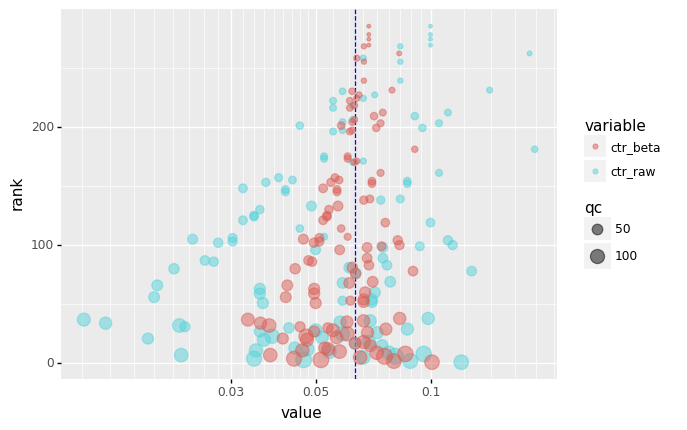

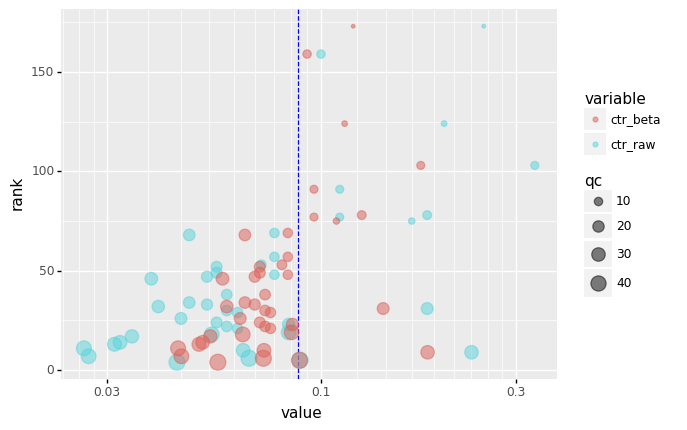

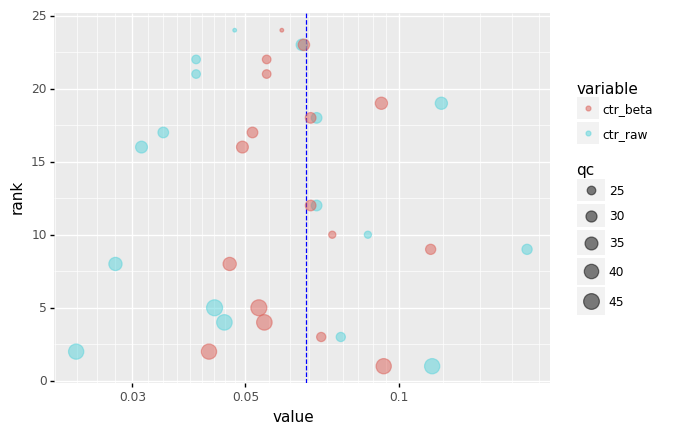

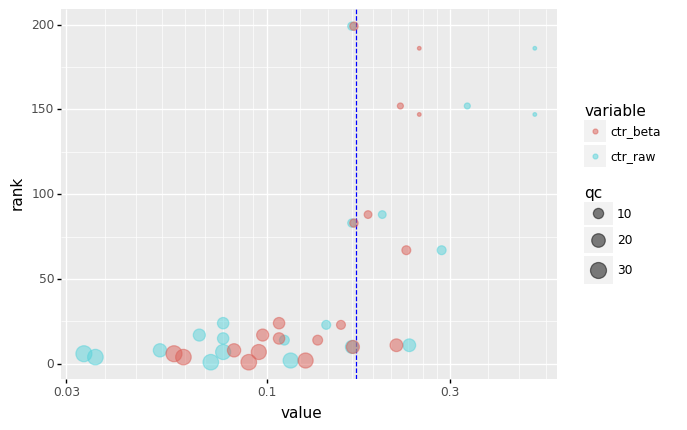

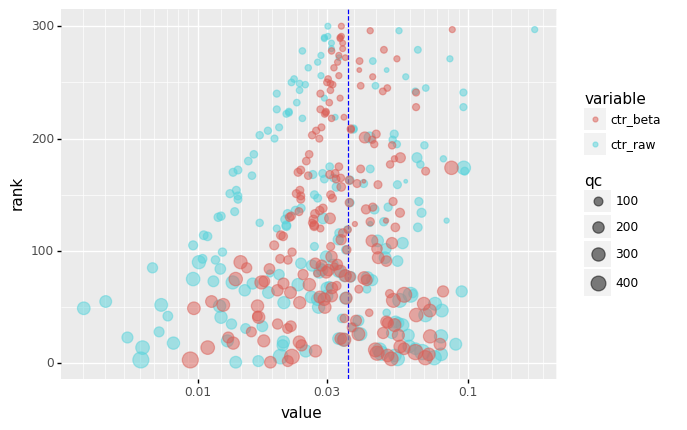

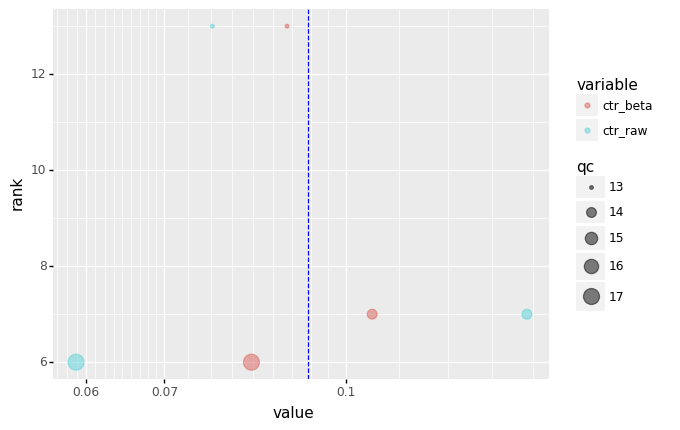

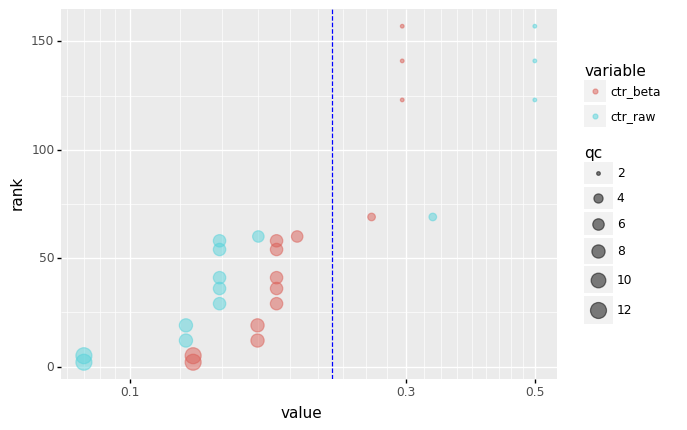

In [25]:
import sys
sys.path.append("../../")
from demo.visualize import draw_dist
from plotnine import *

cnt = 0
for name, gdf in new_df.groupby(["search_keyword"]):
    if cnt == 10:
        break

    # locally
    # myctr = CTR(df=gdf, impression_column="qc", click_column="cc")
    # gdf = myctr.regularize()

    temp = pd.melt(
        gdf[['rank', 'ctr_raw', 'ctr_beta', 'qc']],
        id_vars=['rank', 'qc'], 
        value_vars=['ctr_raw', 'ctr_beta']
    )
    # print(temp.head())
    p = ggplot(temp, aes('value', 'rank', color='variable', size='qc')) \
            + geom_vline(xintercept = myctr.expected_ctr_beta, linetype='dashed', color="blue") \
            + geom_point(alpha = .5) \
            + scale_x_log10()
    fig = p.draw()
    fig.show()

    # temp = pd.melt(
    #     gdf[['id', 'ctr_raw', 'ctr_gaussian', 'qc']],
    #     id_vars=['id', 'qc'], 
    #     value_vars=['ctr_raw', 'ctr_gaussian']
    # )
    # # print(temp.head())
    # p = ggplot(temp, aes('value', 'id', color='variable', size='qc')) \
    #         + geom_vline(xintercept = myctr.mean_ctr, linetype='dashed', color="blue") \
    #         + geom_point(alpha = .5) \
    #         + scale_x_log10()
    # fig = p.draw()
    # fig.show()

    # draw_dist(gdf["ctr_raw"].values.tolist(), title=name)
    # draw_dist(gdf["ctr_beta"].values.tolist())
    # draw_dist(gdf["ctr_gaussian"].values.tolist())
    cnt += 1


## Relevant Score
https://www.microsoft.com/en-us/research/project/mslr/

* 4점: perfectly relevant
* 3점:
* 2점:
* 1점:
* 0점: irrelevant

## Click Models

\text{SERP Clicks} = f(\text{query, document list, device, user preference, UI/UX, ...})

### mCTR 기반 분위수로 점수 부여해보기
- 평균 대비
- Window (4개) 단위로 mCTR 평균값 및 점수부여
- ...

In [ ]:
uqc_mean = df["uqc"].mean()
uqc_50 = df["uqc"].quantile(0.5)
uqc_75 = df["uqc"].quantile(0.75)
uqc_95 = df["uqc"].quantile(0.95)
uqc_99 = df["uqc"].quantile(0.99)
cutoff = uqc_50

def get_relevance_score(ctr, ctr_list):
    #print(ctr, np.quantile(ctr_list, 0.95))
    if ctr >= np.quantile(ctr_list, 0.95):
        return 4
    elif ctr >= np.quantile(ctr_list, 0.75):
        return 3
    elif ctr >= np.quantile(ctr_list, 0.50):
        return 2
    elif ctr >= np.quantile(ctr_list, 0.25):
        return 1
    return 0

def dump_ranking_data():
    """ {grade, query, docid } """
    pass

dump_data = "./ranking/test.txt"
writer = open(dump_data, "w+")

top_k = 50 # FIXME
cnt = 0
queries = set()
for idx, row in df[df.uqc >= cutoff].iterrows():
    # if cnt == 50:
    #     break
    rank2docinfo = {rank:docinfo for rank, docinfo in row["rank2docinfo"].items() if int(rank) <= top_k}
    # ctr_list = [docinfo["ctr"] for rank, docinfo in rank2docinfo.items()]
    # ctr_list = [docinfo["cc"]/(docinfo["qc"]+5) for rank, docinfo in rank2docinfo.items()]
    ctr_list = [docinfo["ucc"]/(docinfo["uqc"]+5) for rank, docinfo in rank2docinfo.items()]

    for rank, docinfo in rank2docinfo.items():
        ctr = docinfo["ucc"]/(docinfo["uqc"]+5)
        relevance = get_relevance_score(ctr, ctr_list)

        if relevance not in (0, 2, 4):
            continue

        writer.write(json.dumps({
            "grade": relevance,
            "query": row["search_keyword"],
            "docid": docinfo["id"],
        }, ensure_ascii=False) + "\n")
        writer.flush()
        queries.add(row["search_keyword"])

    cnt += 1

print(f"Number of data: {len(queries)}")

writer.close()

Number of data: 503


## Make Ranking Data

In [ ]:
import sys
sys.path.append("../../")
from myelasticsearch.ltr_wrapper import LTRWrapper
ltr = LTRWrapper()
print(ltr)

In [ ]:

ltr.add_features_to_goldenset()